Shape of the training set: (60000, 28, 28)
Shape of the testing set: (10000, 28, 28)
Ground truth label (training set): [9 0 0 ... 3 0 5]
Ground truth label (testing set): [9 2 1 ... 8 1 5]
Shape of the training dataset: (60000, 28, 28, 1)
Shape of the testing dataset: (10000, 28, 28, 1)
One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Shape of the One-hot label: (60000, 10), (10000, 10)
n = 2
Inference label: Trousers
Ground truth label: Trousers


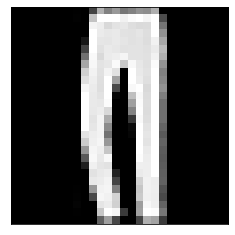

In [2]:
# Import packages used in this script
import numpy as np
import pandas as pd
import random
import time
import os
import keras

## Data, can also load images from other places
from keras.datasets import fashion_mnist

## Build model, load model
from keras.models import Sequential, load_model

## Dense -> Fully Connected
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

## Activation functions
from keras.layers import Dropout, LeakyReLU

## Optimizers
from keras.optimizers import RMSprop, Adam

## Callbacks --- Save Model (one of its parameters)
from keras.callbacks import ModelCheckpoint

## Split whole dataset into two groups(training / validation set)
from sklearn.model_selection import train_test_split

## Compute the accuracy score for the model
from sklearn.metrics import accuracy_score

## Encode integer label into vector
from sklearn.preprocessing import OneHotEncoder

## Plot function
import matplotlib.pyplot as plt

## Data augmentation
from keras.preprocessing.image import ImageDataGenerator

## Load mnist dataset, confirm the shape and the contents of the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of the training set: {}".format(x_train.shape))
print("Shape of the testing set: {}".format(x_test.shape))
print("Ground truth label (training set): {}".format(y_train))
print("Ground truth label (testing set): {}".format(y_test))

## Reshape data whilst normalizing the data in the range(0 ~ 1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255
print("Shape of the training dataset: {}".format(x_train.shape))
## Reshape data whilst normalizing the data in the range(0 ~ 1)
x_test = x_test.reshape(-1, 28, 28, 1) / 255
print("Shape of the testing dataset: {}".format(x_test.shape))

## Encode integer label into one-hot vector
## e.g. 3 -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
## e.g. 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("One-hot label: {}".format(y_test[0]))
print("Shape of the One-hot label: {}, {}".format(y_train.shape, y_test.shape))
'''
# Modified LeNet
model = Sequential()  ## build model graph

## Add the convolution layer (named conv_1) to the graph
## Filter size = 3 * 3, channel = 128, activation function = relu
## Weight initializer following normal distribution
model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = 1,
                 input_shape = (28, 28, 1),
                 padding = 'same', activation = 'relu',
                 kernel_initializer = 'he_normal', name = 'conv_1'))

## Add the pooling layer (named pooling_1) to the graph
## Filter size = 2 * 2, stride = 2
## Not pad zero to the feature map boundary
model.add(MaxPooling2D((2, 2), strides = 2, padding = 'valid',
                       name = 'pooling_1'))
model.add(Dropout(0.1))

## Add the convolution layer (named conv_2) to the graph
## Filter size = 3 * 3, channel = 256, activation function = relu
## Weight initializer following normal distribution
model.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = 1,
                 padding = 'same', activation = 'relu',
                 kernel_initializer = 'he_normal', name = 'conv_2'))

## Add the pooling layer (named pooling_2) to the graph
## Filter size = 2 * 2, stride = 2
## Not pad zero to the feature map boundary
model.add(MaxPooling2D((2, 2), strides = 2, padding = 'valid',
                       name = 'pooling_2'))
model.add(Dropout(0.1))

## Add the convolution layer (named conv_3) to the graph
## Filter size = 3 * 3, channel = 512, activation function = relu
## Weight initializer following normal distribution
model.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = 1,
                 padding = 'same', activation = 'relu',
                 kernel_initializer = 'he_normal', name = 'conv_3'))

## Add the pooling layer (named pooling_3) to the graph
## Filter size = 2 * 2, stride = 2
## Not pad zero to the feature map boundary
model.add(MaxPooling2D((2, 2), strides = 2, padding = 'valid',
                       name = 'pooling_3'))
model.add(Dropout(0.1))

## Reshape the feature map into vectors
model.add(Flatten(name = 'flatten'))

## Add the fully connected layer (named fs_1) to the graph
## Units = 120, activation function = relu
## Weight initializer following normal distribution
model.add(Dense(512, activation = 'relu',
                kernel_initializer = 'he_normal', name = 'fs_1'))
model.add(Dropout(0.1))

## Add the fully connected layer (named fs_2) to the graph
## Units = 84, activation function = relu
## Weight initializer following normal distribution
model.add(Dense(256, activation = 'relu',
                kernel_initializer = 'he_normal', name = 'fs_2'))
model.add(Dropout(0.1))

## Add the fully connected layer (named fs_2) to the graph
## Units = 128, activation function = relu
## Weight initializer following normal distribution
model.add(Dense(128, activation = 'relu',
                kernel_initializer = 'he_normal', name = 'fs_3'))
model.add(Dropout(0.1))

## Add the output layer (named logit) to the graph
## Units = 10, activation function = softmax(normalize)
## Weight initializer following normal distribution
model.add(Dense(units = 10, activation = 'softmax',
                kernel_initializer = 'he_normal', name = 'logit'))

## Define the objection function and optimizer
## Define the evaluation metrics: accuracy (for classification)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

## Print the detail of the model
model.summary()

## Training with data augmentation
## *******************************
datagen = ImageDataGenerator(rotation_range = 20,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.2, 
                shear_range = 0.2)
datagen.fit(x_train)
s = datagen.flow(x_train, y_train, batch_size = 256)
history = model.fit_generator(s, steps_per_epoch = 100, epochs = 20,
                             validation_data = (x_test, y_test),
                             callbacks = [ModelCheckpoint('Fashion_MNIST_model.h5',
                                             monitor = 'val_accuracy',
                                             save_best_only = True)])

### Train the whole model using "fit" function
### Epoch: Number of training loops
### Shuffle: perturb order of the training data
### Save the model (named MNIST_Project_model.h5)
### Save the model only when the testing accuracy achieves the best
history = model.fit(x_train, y_train, epochs = 20, 
                    validation_data = (x_test, y_test),
                    shuffle = True, batch_size = 100, 
                    callbacks = [ModelCheckpoint('Fashion_MNIST_model.h5',
                                    monitor = 'val_accuracy',
                                    save_best_only = True)])
'''
model_test = load_model('Fashion_MNIST_model.h5') 

### Plot testing data
def plot(a):
    ## Multiply 255 to the normalized data and transform the data type from float into int
    a *= 255
    a = a.astype(np.uint8)
    return a.reshape(28, 28)

# ********** Display testing images **********
print("n = ", end = '')
n = int(input())
ax = plt.subplot(1, 1, 1)
plt.imshow(plot(x_test[n]), cmap = 'gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
    
category = {
    0: 'T-shirt',
    1: 'Trousers',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandals',
    6: 'Shirt',
    7: 'Sneakers',
    8: 'Bag',
    9: 'Ankle Boot'
}
### Print inference results corresponding to the images we plot
prediction = model_test.predict(x_test[n].reshape(-1, 28, 28, 1))
print("Inference label: {}".format(category[np.argmax(prediction, axis = 1)[0]]))
print("Ground truth label: {}".format(category[np.argmax(y_test[n], axis = 0)])) 
    # y_test[n] is one-hot-encoded, use np.argmax to decode
    
# best val_accuracy: 93.08%
